In [1]:
import os
import json
import numpy as np

In [2]:
results_root = '../../results/planning/igibson/official_run_no_cot/predicates'
splits = ['simple','medium','hard']

exp_paths = {}
for split in splits:
    results_path = os.path.join(results_root,split)
    exp_paths[split] = [os.path.join(results_path,d) for d in os.listdir(results_path) if not '.ipynb_checkpoints' in d]
exp_paths

{'simple': ['../../results/planning/igibson/official_run_no_cot/predicates/simple/InternVL3-8B',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/InternVL3-78B',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/gemma-3-12b-it',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/gemma-3-27b-it',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/llava-onevision-qwen2-7b-ov-hf',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/Qwen2.5-VL-72B-Instruct',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/aya-vision-32b',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/Phi-4-multimodal-instruct',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/Qwen2.5-VL-7B-Instruct',
  '../../results/planning/igibson/official_run_no_cot/predicates/simple/deepseek-vl2',
  '../../results/planning/igibson/official_run_no_cot/predica

In [3]:
# user specified, just the main job id without the array job suffices -> why all jobs have different slurm ids???
#runs_ids = ['7157692','7157903','7158205', '7159268', '7159742', '7165833', '7169514', '7171078']
runs_ids = [
    '7174749', # main run big models
    '7174750', # main run small models
    '7181190', # recovery run small models
    '7181194', # recovery run InternVL big
    '7181196', # recovery run Aya 32B
    '7183693', # recovery run Gemma3 27B
]
all_results = {}
main_results = {}
for split in exp_paths.keys():
    all_results[split] = {}
    main_results[split] = {}
    
    for exp_dir in exp_paths[split]: # List[str]
        # Look for json with id within runs_ids
        exp_results_json_name = [
            os.path.join(exp_dir,f) for f in os.listdir(exp_dir) if np.any([run_id in f for run_id in runs_ids])
        ]
        if len(exp_results_json_name)==1:
            # extract json
            with open(exp_results_json_name[0]) as f:
                exp_results_json = json.load(f)
            #print(exp_results_json['statistics'])
            model_name = exp_results_json['metadata']['model_name']
            all_results[split][model_name] = exp_results_json
            main_results[split][model_name] = {k:exp_results_json[k] for k in ['task_accuracy', 'action_accuracy', 'predicate_accuracy']}
            
        elif len(exp_results_json_name)>1:
            print(f"More than 1 runs_ids matching for {exp_dir} - skip")
            
        elif len(exp_results_json_name)==0:
            print(f"No runs_ids matching for {exp_dir} - skip")
            
        else:
            raise NotImplementedError  

print(main_results)

More than 1 runs_ids matching for ../../results/planning/igibson/official_run_no_cot/predicates/hard/deepseek-vl2 - skip
{'simple': {'OpenGVLab/InternVL3-8B': {'task_accuracy': 0.0, 'action_accuracy': 0.22330097087378642, 'predicate_accuracy': 0.7327466419638722}, 'OpenGVLab/InternVL3-78B': {'task_accuracy': 0.12, 'action_accuracy': 0.26436781609195403, 'predicate_accuracy': 0.7055616139585605}, 'google/gemma-3-12b-it': {'task_accuracy': 0.16, 'action_accuracy': 0.3236994219653179, 'predicate_accuracy': 0.5161290322580645}, 'google/gemma-3-27b-it': {'task_accuracy': 0.08, 'action_accuracy': 0.17937219730941703, 'predicate_accuracy': 0.6704119850187266}, 'llava-hf/llava-onevision-qwen2-7b-ov-hf': {'task_accuracy': 0.04, 'action_accuracy': 0.21875, 'predicate_accuracy': 0.5902726602800294}, 'Qwen/Qwen2.5-VL-72B-Instruct': {'task_accuracy': 0.04, 'action_accuracy': 0.06, 'predicate_accuracy': 0.7158239700374532}, 'CohereLabs/aya-vision-32b': {'task_accuracy': 0.04, 'action_accuracy': 0.37

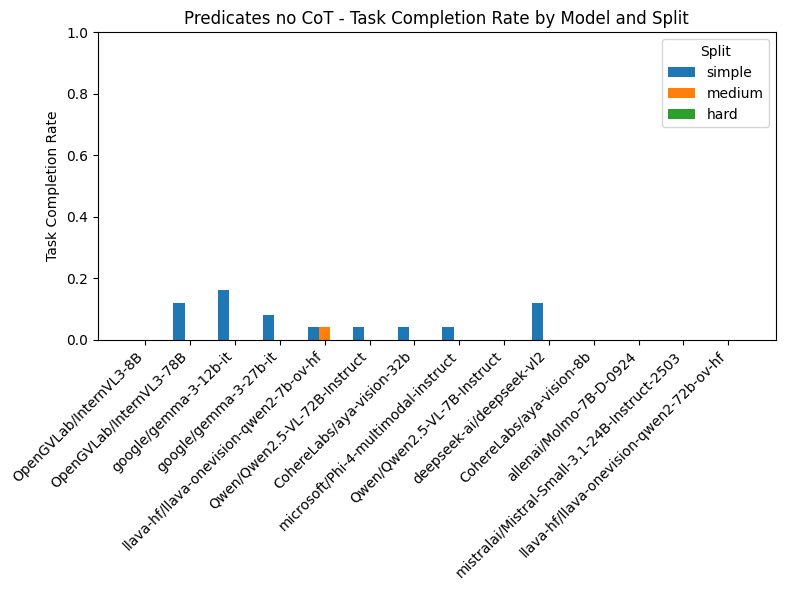

In [4]:
import numpy as np
import matplotlib.pyplot as plt

splits = list(main_results.keys())
models = list(next(iter(main_results.values())).keys())

x = np.arange(len(models))               # the “center” of each group
width = 0.25                              # width of each bar
n_splits = len(splits)

# total width of all bars in a group
total_width = width * n_splits
# amount to shift the leftmost bar so that the group is centred at x
shift = total_width/2 - width/2

fig, ax = plt.subplots(figsize=(8, 6))

for i, split in enumerate(splits):
    # calculate the offsets so bars span [x – shift … x + shift]
    offsets = x - shift + i * width
    rates = [
        main_results[split][model]["task_accuracy"] if model in main_results[split].keys() else 0 
        for model in models
    ]
    ax.bar(offsets, rates, width, label=split, align='center')

# Formatting
ax.set_ylabel('Task Completion Rate')
#ax.set_xlabel('Model')
ax.set_title('Predicates no CoT - Task Completion Rate by Model and Split')

# place ticks at the group centers,
# rotate and right-align the labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_ylim(0, 1)  # assuming rates between 0 and 1
ax.legend(title='Split')
plt.tight_layout()
plt.show()


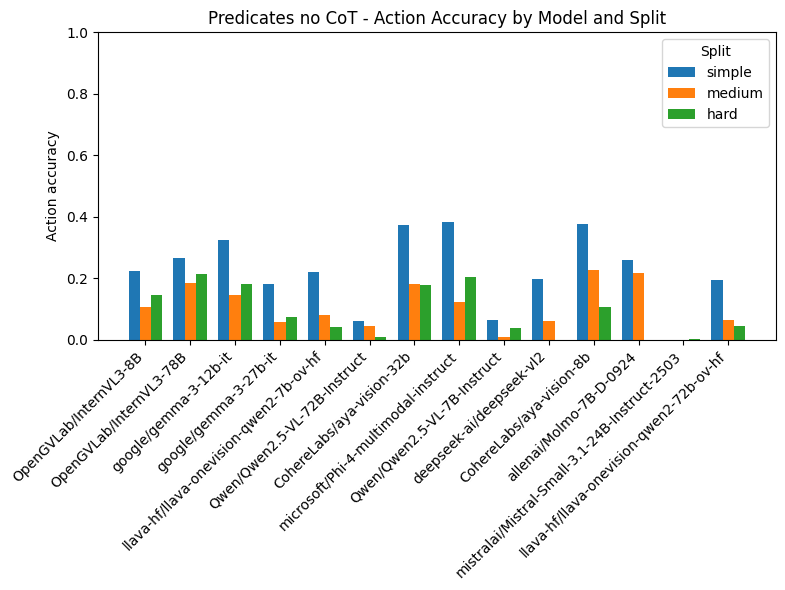

In [5]:
import numpy as np
import matplotlib.pyplot as plt

splits = list(main_results.keys())
models = list(next(iter(main_results.values())).keys())

x = np.arange(len(models))               # the “center” of each group
width = 0.25                              # width of each bar
n_splits = len(splits)

# total width of all bars in a group
total_width = width * n_splits
# amount to shift the leftmost bar so that the group is centred at x
shift = total_width/2 - width/2

fig, ax = plt.subplots(figsize=(8, 6))

for i, split in enumerate(splits):
    # calculate the offsets so bars span [x – shift … x + shift]
    offsets = x - shift + i * width
    rates = [
        main_results[split][model]["action_accuracy"] if model in main_results[split].keys() else 0 
        for model in models
    ]
    ax.bar(offsets, rates, width, label=split, align='center')

# Formatting
ax.set_ylabel('Action accuracy')
#ax.set_xlabel('Model')
ax.set_title('Predicates no CoT - Action Accuracy by Model and Split')

# place ticks at the group centers,
# rotate and right-align the labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_ylim(0, 1)  # assuming rates between 0 and 1
ax.legend(title='Split')
plt.tight_layout()
plt.show()


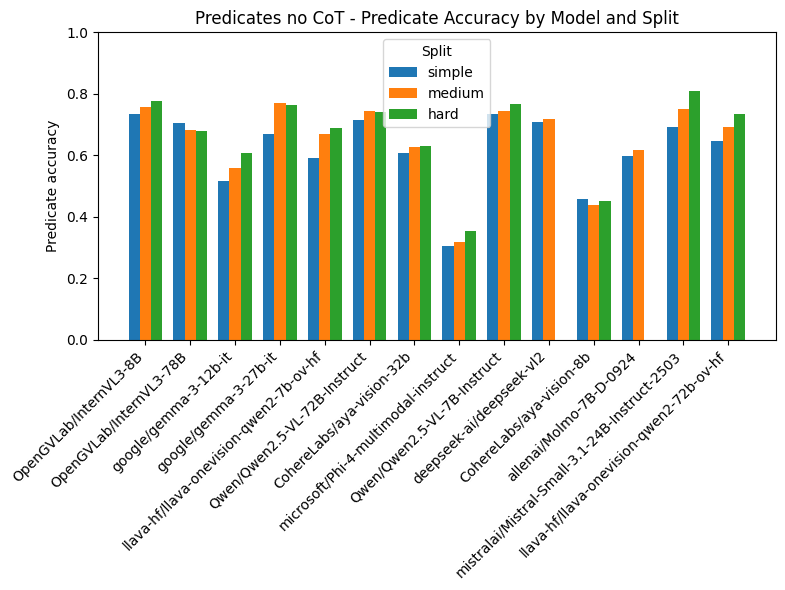

In [6]:
import numpy as np
import matplotlib.pyplot as plt

splits = list(main_results.keys())
models = list(next(iter(main_results.values())).keys())

x = np.arange(len(models))               # the “center” of each group
width = 0.25                              # width of each bar
n_splits = len(splits)

# total width of all bars in a group
total_width = width * n_splits
# amount to shift the leftmost bar so that the group is centred at x
shift = total_width/2 - width/2

fig, ax = plt.subplots(figsize=(8, 6))

for i, split in enumerate(splits):
    # calculate the offsets so bars span [x – shift … x + shift]
    offsets = x - shift + i * width
    rates = [
        main_results[split][model]["predicate_accuracy"] if model in main_results[split].keys() else 0 
        for model in models
    ]
    ax.bar(offsets, rates, width, label=split, align='center')

# Formatting
ax.set_ylabel('Predicate accuracy')
#ax.set_xlabel('Model')
ax.set_title('Predicates no CoT - Predicate Accuracy by Model and Split')

# place ticks at the group centers,
# rotate and right-align the labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_ylim(0, 1)  # assuming rates between 0 and 1
ax.legend(title='Split')
plt.tight_layout()
plt.show()


In [7]:
from tabulate import tabulate

models = list(next(iter(main_results.values())).keys())
metric = "task_accuracy"
# Create a list of rows for tabulate
rows = []
for model in models:
    row = [model]
    for split in main_results.keys():
        entry = [f"{main_results[split][model][metric]:.2f}" if model in main_results[split].keys() else 'N/A']
        row += entry
    rows.append(row)

sorted_rows = sorted(rows, key=lambda row: float(row[1]) if row[1] != 'N/A' else -inf, reverse=True)

# Print in tabular form
print(tabulate(sorted_rows, headers=["Model", "Simple", "Medium", "Hard"], floatfmt=".2f"))

Model                                            Simple    Medium  Hard
---------------------------------------------  --------  --------  ------
google/gemma-3-12b-it                              0.16      0.00  0.00
OpenGVLab/InternVL3-78B                            0.12      0.00  0.00
deepseek-ai/deepseek-vl2                           0.12      0.00  N/A
google/gemma-3-27b-it                              0.08      0.00  0.00
llava-hf/llava-onevision-qwen2-7b-ov-hf            0.04      0.04  0.00
Qwen/Qwen2.5-VL-72B-Instruct                       0.04      0.00  0.00
CohereLabs/aya-vision-32b                          0.04      0.00  0.00
microsoft/Phi-4-multimodal-instruct                0.04      0.00  0.00
OpenGVLab/InternVL3-8B                             0.00      0.00  0.00
Qwen/Qwen2.5-VL-7B-Instruct                        0.00      0.00  0.00
CohereLabs/aya-vision-8b                           0.00      0.00  0.00
allenai/Molmo-7B-D-0924                            0.00      0.